In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pltfrom sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import ADASYN 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
data = pd.read_csv("./train.csv")

ModuleNotFoundError: No module named 'eli5'

In [4]:
data.head()
data.columns

Index(['label', 'id', 'visitTime', 'purchaseTime', 'hour', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'C9', 'N2', 'N3', 'N4', 'N5', 'N6',
       'N7', 'N8', 'N9', 'N10', 'C10', 'C11', 'C12'],
      dtype='object')

In [5]:
print (data)


       label      id  visitTime  purchaseTime  hour          C1          C2  \
0         -1      37   19274330            -1     0  2569487005  1830830742   
1         -1      55   19274334            -1     0  3191875643   403381353   
2         -1     114   19274353            -1     0  2634604934   403381353   
3         -1     128   19274358            -1     0  2569487005   403381353   
4         -1     164   19274367            -1     0  2569487005   403381353   
...      ...     ...        ...           ...   ...         ...         ...   
31423     -1  638420   19360259            -1    23  2569487005  2018710401   
31424     -1  638422   19360260            -1    23  2569487005   403381353   
31425     -1  638461   19360392            -1    23   497926344  1235983246   
31426     -1  638496   19360528            -1    23  2569487005   403381353   
31427     -1  638505   19360545            -1    23  2569487005   403381353   

               C3          C4          C5  ...  N4 

In [6]:
data.info

<bound method DataFrame.info of        label      id  visitTime  purchaseTime  hour          C1          C2  \
0         -1      37   19274330            -1     0  2569487005  1830830742   
1         -1      55   19274334            -1     0  3191875643   403381353   
2         -1     114   19274353            -1     0  2634604934   403381353   
3         -1     128   19274358            -1     0  2569487005   403381353   
4         -1     164   19274367            -1     0  2569487005   403381353   
...      ...     ...        ...           ...   ...         ...         ...   
31423     -1  638420   19360259            -1    23  2569487005  2018710401   
31424     -1  638422   19360260            -1    23  2569487005   403381353   
31425     -1  638461   19360392            -1    23   497926344  1235983246   
31426     -1  638496   19360528            -1    23  2569487005   403381353   
31427     -1  638505   19360545            -1    23  2569487005   403381353   

               C3  

In [7]:
data.shape
data['C1'].value_counts()

2569487005    8430
2108523568       7
2084406919       6
3438432991       5
256353298        5
              ... 
1427705163       1
4180196685       1
596547023        1
3559230936       1
77004800         1
Name: C1, Length: 22595, dtype: int64

In [8]:
data.describe()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
count,31428.000000,31428.000000,3.142800e+04,3.142800e+04,31428.000000,3.142800e+04,3.142800e+04,3.142800e+04,3.142800e+04,3.142800e+04,...,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,3.142800e+04,3.142800e+04,3.142800e+04
mean,-0.996373,321870.448835,1.931855e+07,3.504330e+04,11.799701,2.264373e+09,1.331820e+09,2.255368e+09,1.018468e+09,2.741699e+09,...,0.134307,0.002386,0.027269,0.002164,0.415680,0.042319,0.057560,2.218926e+09,2.939366e+09,2.158890e+09
std,0.085098,184665.780120,1.690395e+04,8.221503e+05,4.695434,1.077516e+09,7.900907e+08,1.125852e+09,7.260969e+08,3.771211e+08,...,1.258795,0.156001,0.562668,0.079745,3.184785,1.008314,1.158253,1.235285e+09,1.020598e+09,1.416777e+09
min,-1.000000,37.000000,1.927433e+07,-1.000000e+00,0.000000,7.942600e+04,4.033814e+08,5.538985e+06,3.063949e+08,2.116767e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.626600e+04,4.393702e+07,2.456084e+08
25%,-1.000000,162636.500000,1.930609e+07,-1.000000e+00,8.000000,1.464958e+09,4.033814e+08,1.408383e+09,6.524818e+08,2.116767e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.140301e+09,2.379634e+09,1.213939e+09
50%,-1.000000,322691.500000,1.931761e+07,-1.000000e+00,12.000000,2.569487e+09,1.235983e+09,2.243934e+09,6.524818e+08,2.967513e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.274128e+09,3.617852e+09,1.284343e+09
75%,-1.000000,481852.000000,1.933113e+07,-1.000000e+00,15.000000,2.834768e+09,2.018710e+09,3.326547e+09,6.524818e+08,2.967513e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.376114e+09,3.831440e+09,4.220792e+09
max,1.000000,638505.000000,1.936054e+07,1.935732e+07,23.000000,4.294924e+09,2.541204e+09,4.292704e+09,2.308171e+09,3.955179e+09,...,20.000000,20.000000,20.000000,10.000000,97.000000,85.000000,86.000000,4.294964e+09,3.831440e+09,4.220792e+09


In [9]:
data.describe(include="all")

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
count,31428.000000,31428.000000,3.142800e+04,3.142800e+04,31428.000000,3.142800e+04,3.142800e+04,3.142800e+04,3.142800e+04,3.142800e+04,...,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,3.142800e+04,3.142800e+04,3.142800e+04
mean,-0.996373,321870.448835,1.931855e+07,3.504330e+04,11.799701,2.264373e+09,1.331820e+09,2.255368e+09,1.018468e+09,2.741699e+09,...,0.134307,0.002386,0.027269,0.002164,0.415680,0.042319,0.057560,2.218926e+09,2.939366e+09,2.158890e+09
std,0.085098,184665.780120,1.690395e+04,8.221503e+05,4.695434,1.077516e+09,7.900907e+08,1.125852e+09,7.260969e+08,3.771211e+08,...,1.258795,0.156001,0.562668,0.079745,3.184785,1.008314,1.158253,1.235285e+09,1.020598e+09,1.416777e+09
min,-1.000000,37.000000,1.927433e+07,-1.000000e+00,0.000000,7.942600e+04,4.033814e+08,5.538985e+06,3.063949e+08,2.116767e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.626600e+04,4.393702e+07,2.456084e+08
25%,-1.000000,162636.500000,1.930609e+07,-1.000000e+00,8.000000,1.464958e+09,4.033814e+08,1.408383e+09,6.524818e+08,2.116767e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.140301e+09,2.379634e+09,1.213939e+09
50%,-1.000000,322691.500000,1.931761e+07,-1.000000e+00,12.000000,2.569487e+09,1.235983e+09,2.243934e+09,6.524818e+08,2.967513e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.274128e+09,3.617852e+09,1.284343e+09
75%,-1.000000,481852.000000,1.933113e+07,-1.000000e+00,15.000000,2.834768e+09,2.018710e+09,3.326547e+09,6.524818e+08,2.967513e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.376114e+09,3.831440e+09,4.220792e+09
max,1.000000,638505.000000,1.936054e+07,1.935732e+07,23.000000,4.294924e+09,2.541204e+09,4.292704e+09,2.308171e+09,3.955179e+09,...,20.000000,20.000000,20.000000,10.000000,97.000000,85.000000,86.000000,4.294964e+09,3.831440e+09,4.220792e+09


In [10]:
data.dtypes

label           int64
id              int64
visitTime       int64
purchaseTime    int64
hour            int64
C1              int64
C2              int64
C3              int64
C4              int64
C5              int64
C6              int64
C7              int64
C8              int64
N1              int64
C9              int64
N2              int64
N3              int64
N4              int64
N5              int64
N6              int64
N7              int64
N8              int64
N9              int64
N10             int64
C10             int64
C11             int64
C12             int64
dtype: object

In [11]:
data.duplicated(subset=['id']).any()

False

In [12]:
data[["label","C1", "C2","C3", "C4", "C5", "C6", "C7", "C8","C9", "C10","C11","C12"]] = data[["label","C1", "C2","C3", "C4", "C5", "C6", "C7", "C8","C9", "C10","C11","C12"]].astype(str) 

In [13]:
data.dtypes

for i in data.columns:
    print ("---- %s ---"% i)
    print (data[i].value_counts())

---- label ---
-1    31371
1        57
Name: label, dtype: int64
---- id ---
399357    1
159399    1
525994    1
278189    1
448176    1
         ..
68628     1
590869    1
476883    1
5143      1
327680    1
Name: id, Length: 31428, dtype: int64
---- visitTime ---
19328699    6
19319226    6
19325796    5
19314062    5
19310993    5
           ..
19310525    1
19283902    1
19314623    1
19318721    1
19300352    1
Name: visitTime, Length: 24587, dtype: int64
---- purchaseTime ---
-1           31371
 19307708        1
 19319002        1
 19306613        1
 19298361        1
 19330955        1
 19318637        1
 19324431        1
 19295049        1
 19331883        1
 19325720        1
 19344902        1
 19331996        1
 19325359        1
 19323160        1
 19327407        1
 19327835        1
 19323177        1
 19300350        1
 19344084        1
 19345863        1
 19312951        1
 19304723        1
 19335360        1
 19337379        1
 19302544        1
 19325069        1


In [14]:
dataplay = data[["label","C1","C2", "C3","C4", "C5","C6","C7","C8","C9","C10","C11","C12", "N1","N2","N3","N4","N5","N6","N7","N8","N9"]]
dataplay[["label","C1", "C2","C3", "C4", "C5", "C6", "C7", "C8","C9", "C10","C11","C12"]] = dataplay[["label","C1", "C2","C3", "C4", "C5", "C6", "C7", "C8","C9", "C10","C11","C12"]].astype('category')


/Users/Shared/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
dataplay.describe()

,N1,N2,N3,N4,N5,N6,N7,N8,N9
count,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000
mean,0.510882,0.419594,0.169849,0.134307,0.002386,0.027269,0.002164,0.415680,0.042319
std,1.157846,1.681422,1.286043,1.258795,0.156001,0.562668,0.079745,3.184785,1.008314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,15.000000,20.000000,20.000000,20.000000,20.000000,10.000000,97.000000,85.000000


In [16]:
dataplay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31428 entries, 0 to 31427
Data columns (total 22 columns):
label    31428 non-null category
C1       31428 non-null category
C2       31428 non-null category
C3       31428 non-null category
C4       31428 non-null category
C5       31428 non-null category
C6       31428 non-null category
C7       31428 non-null category
C8       31428 non-null category
C9       31428 non-null category
C10      31428 non-null category
C11      31428 non-null category
C12      31428 non-null category
N1       31428 non-null int64
N2       31428 non-null int64
N3       31428 non-null int64
N4       31428 non-null int64
N5       31428 non-null int64
N6       31428 non-null int64
N7       31428 non-null int64
N8       31428 non-null int64
N9       31428 non-null int64
dtypes: category(13), int64(9)
memory usage: 5.0 MB


          N1        N2        N3        N4        N5        N6        N7  \
N1  1.000000  0.423092  0.083125  0.110351 -0.000232  0.052563  0.028004   
N2  0.423092  1.000000 -0.022953  0.039056 -0.003818  0.010070  0.003433   
N3  0.083125 -0.022953  1.000000  0.349852  0.127400  0.294465  0.178854   
N4  0.110351  0.039056  0.349852  1.000000 -0.001632  0.566682  0.304263   
N5 -0.000232 -0.003818  0.127400 -0.001632  1.000000 -0.000741 -0.000415   
N6  0.052563  0.010070  0.294465  0.566682 -0.000741  1.000000  0.492257   
N7  0.028004  0.003433  0.178854  0.304263 -0.000415  0.492257  1.000000   
N8  0.125647  0.010651  0.681235  0.825176  0.102013  0.669907  0.329226   
N9  0.053844  0.006042  0.161171  0.329649  0.017159  0.373009  0.070884   

          N8        N9  
N1  0.125647  0.053844  
N2  0.010651  0.006042  
N3  0.681235  0.161171  
N4  0.825176  0.329649  
N5  0.102013  0.017159  
N6  0.669907  0.373009  
N7  0.329226  0.070884  
N8  1.000000  0.437009  
N9  0.437009  

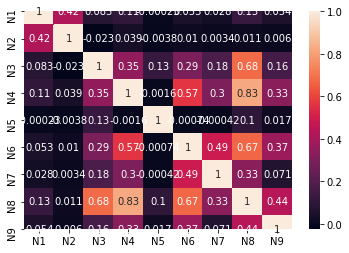

In [17]:
corrMatrix = dataplay.corr()
print (corrMatrix)
sns.heatmap(corrMatrix, annot=True)

          N1        N4        N5        N9
N1  1.000000  0.110351 -0.000232  0.053844
N4  0.110351  1.000000 -0.001632  0.329649
N5 -0.000232 -0.001632  1.000000  0.017159
N9  0.053844  0.329649  0.017159  1.000000


/Users/Shared/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


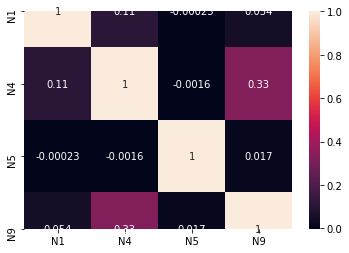

In [18]:
#removing highly correlated factors N2,N3,N6,N7, N8 anything with more than .4 correlation amongst the variables and
#doesn't explain much of the labels
columns_int = ['N2', 'N3', 'N6','N7','N8']
dataplay.drop(columns_int, inplace=True, axis=1)
corrMatrix = dataplay.corr()
print (corrMatrix)
sns.heatmap(corrMatrix, annot=True)

In [19]:
print(dataplay["C1"].nunique())
print(dataplay["C2"].nunique())
print(dataplay["C3"].nunique())
print(dataplay["C4"].nunique())
print(dataplay["C5"].nunique())
print(dataplay["C6"].nunique())
print(dataplay["C7"].nunique())
print(dataplay["C8"].nunique())
print(dataplay["C9"].nunique())
print(dataplay["C10"].nunique())
print(dataplay["C11"].nunique())
print(dataplay["C12"].nunique())



22595
8
2863
4
3
84
6
23
60
28653
21
19


In [20]:
#remove columns C1, C3, C6, C10 since they have too many distinct variables to consider
columns_cat = ['C1', 'C3', 'C6','C10']
dataplay.drop(columns_cat, inplace=True, axis=1)

In [21]:
dataplay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31428 entries, 0 to 31427
Data columns (total 13 columns):
label    31428 non-null category
C2       31428 non-null category
C4       31428 non-null category
C5       31428 non-null category
C7       31428 non-null category
C8       31428 non-null category
C9       31428 non-null category
C11      31428 non-null category
C12      31428 non-null category
N1       31428 non-null int64
N4       31428 non-null int64
N5       31428 non-null int64
N9       31428 non-null int64
dtypes: category(9), int64(4)
memory usage: 1.2 MB


In [22]:
dataplay['label'].value_counts()

-1    31371
1        57
Name: label, dtype: int64

In [23]:
dataplay= dataplay.replace('-1', "0") 

In [24]:
dataplay['label'].value_counts()


0    31371
1       57
Name: label, dtype: int64

In [25]:
#split x and y up in dataplay
y_values= pd.DataFrame(dataplay['label'])
x_values= pd.DataFrame(dataplay.loc[:, dataplay.columns != 'label'])


In [26]:
#use SMOTE to balance out the dataset
oversample = SMOTE()
x_values, y_values = oversample.fit_resample(x_values, y_values)

In [27]:
y_values['label'].value_counts()

1    31371
0    31371
Name: label, dtype: int64

In [28]:
 x_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62742 entries, 0 to 62741
Data columns (total 12 columns):
C2     62742 non-null object
C4     62742 non-null object
C5     62742 non-null object
C7     62742 non-null object
C8     62742 non-null object
C9     62742 non-null object
C11    62742 non-null object
C12    62742 non-null object
N1     62742 non-null int64
N4     62742 non-null int64
N5     62742 non-null int64
N9     62742 non-null int64
dtypes: int64(4), object(8)
memory usage: 5.7+ MB


In [46]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size = 0.25, random_state = 0)

In [47]:
#the first model using Logistic regression
from sklearn.linear_model import LogisticRegression
classifier_logistic = LogisticRegression(random_state = 0)
classifier_logistic.fit(X_train, y_train.values.ravel())
y_pred_logistic = classifier_logistic.predict(X_test)

In [48]:
#the second model use Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier_NB= GaussianNB()
classifier_NB.fit(X_train, y_train.values.ravel())
y_pred_NB= classifier_NB.predict(X_test)

In [59]:
#the third model use Random forest
from sklearn.ensemble import RandomForestClassifier
classifier_rf= RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train.values.ravel())

# Predicting the Test set results
y_pred_rf= classifier_rf.predict(X_test)



     importance
N9     0.370906
C7     0.179095
C9     0.111435
N4     0.102140
C12    0.060439
C8     0.049376
C11    0.042720
C2     0.032630
C5     0.016514
N1     0.012739
N5     0.011019
C4     0.010987


In [50]:
#Confusion metrics of Log Regression & Naive Bayes

from sklearn.metrics import confusion_matrix
cm_log= confusion_matrix(y_test, y_pred_logistic)
cm_NB= confusion_matrix(y_test, y_pred_NB)
cm_RF= confusion_matrix(y_test, y_pred_rf)

print(cm_log)
print(cm_NB)
print(cm_RF)

[[5776 2056]
 [2703 5151]]
[[5655 2177]
 [2436 5418]]
[[7828    4]
 [   6 7848]]


In [51]:
#plot an ROC & AUC Curve

y_pred_logistic = y_pred_logistic.astype(np.int64)
y_pred_NB = y_pred_NB.astype(np.int64)
y_pred_rf = y_pred_rf.astype(np.int64)
y_test1= y_test.astype(np.int64)

# calculate scores
log_auc = roc_auc_score(y_test, y_pred_logistic)
NB_auc = roc_auc_score(y_test, y_pred_NB)
RF_auc = roc_auc_score(y_test, y_pred_rf)

#summarize scores

print('Logistic: ROC AUC=%.3f' % (log_auc))
print('Naive Bayes: ROC AUC=%.3f' % (NB_auc))
print('Random Forest: ROC AUC=%.3f' % (RF_auc))

#The random forest might be overfitted, hence Naive Bayes is the best option

Logistic: ROC AUC=0.697
Naive Bayes: ROC AUC=0.706
Random Forest: ROC AUC=0.999


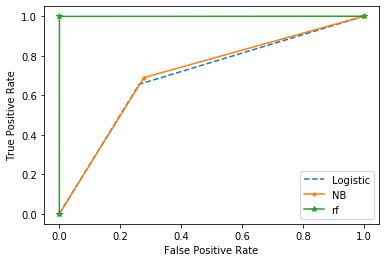

In [52]:
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test1, y_pred_logistic)
NB_fpr, NB_tpr, _ = roc_curve(y_test1, y_pred_NB)
RF_fpr, RF_tpr, _ = roc_curve(y_test1, y_pred_rf)

# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='Logistic')
plt.plot(NB_fpr, NB_tpr, marker='.', label='NB')
plt.plot(RF_fpr, RF_tpr, marker='*', label='rf')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [65]:
#explainability of the model for Random Forest
feature_importances_rf = pd.DataFrame(classifier_rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 
                                                                        ascending=False)

print(feature_importances_rf)
#N9 is the most important

     importance
N9     0.370906
C7     0.179095
C9     0.111435
N4     0.102140
C12    0.060439
C8     0.049376
C11    0.042720
C2     0.032630
C5     0.016514
N1     0.012739
N5     0.011019
C4     0.010987


In [127]:
#explainability of the model for Random Forest
feature_importances_log = classifier_logistic.coef_
feature_importances_log= feature_importances_log.reshape((12,1)).ravel()
column_titles=pd.DataFrame(list(X_train))
column_titles= column_titles.to_numpy()
column_titles= column_titles.ravel()
log_impt= np.column_stack([column_titles, feature_importances_log])


log_impt= log_impt[log_impt[:,1].argsort()]
print(log_impt)
#C7 and C9 are the most important categorical variables and N9 is the most important Numerical variable

[['C7' -1.2699777341037727e-09]
 ['C12' -3.484427825101948e-10]
 ['C4' -1.8792560049199158e-10]
 ['N1' 2.4018595819135045e-18]
 ['N5' 1.3257170043751062e-17]
 ['N4' 9.291157658488771e-17]
 ['N9' 1.8579522600044516e-16]
 ['C5' 1.6041786461346558e-10]
 ['C2' 1.687161356982366e-10]
 ['C8' 2.138802187214645e-10]
 ['C11' 2.1539385920976642e-10]
 ['C9' 5.676623247596804e-10]]
